In [2]:


import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files


print("Please upload a grayscale or color image file (e.g., nature3.png)")
uploaded = files.upload()
fname = next(iter(uploaded))





Please upload a grayscale or color image file (e.g., nature3.png)


Saving image.png to image.png


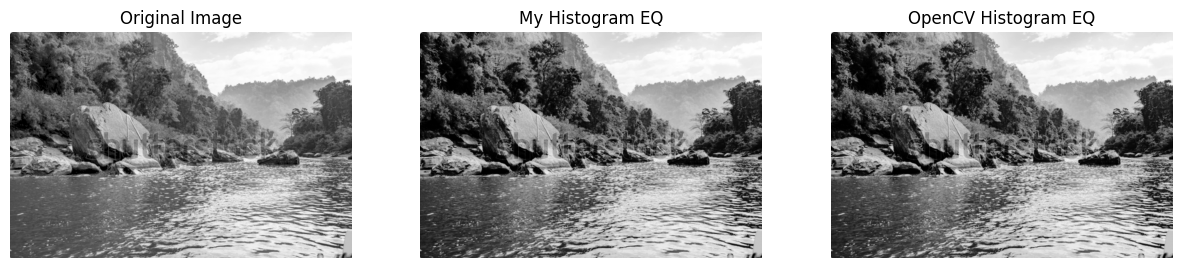

In [3]:

img = cv2.imread(fname, cv2.IMREAD_GRAYSCALE)


def my_hist_eq(image):
    # Flatten image
    flat = image.flatten()

    # Histogram
    hist, bins = np.histogram(image.flatten(), 256, [0,256])
    cdf = hist.cumsum()

    # Normalize CDF to 0-255
    cdf_normalized = ((cdf - cdf.min()) * 255) // (cdf.max() - cdf.min())

    # Map pixel values
    img_eq = cdf_normalized[flat].reshape(image.shape).astype(np.uint8)
    return img_eq

# Apply custom histogram equalization
img_eq_my = my_hist_eq(img)


img_eq_cv2 = cv2.equalizeHist(img)


plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
plt.title('Original Image')
plt.imshow(img, cmap='gray')
plt.axis('off')

plt.subplot(1,3,2)
plt.title('My Histogram EQ')
plt.imshow(img_eq_my, cmap='gray')
plt.axis('off')

plt.subplot(1,3,3)
plt.title('OpenCV Histogram EQ')
plt.imshow(img_eq_cv2, cmap='gray')
plt.axis('off')

plt.show()

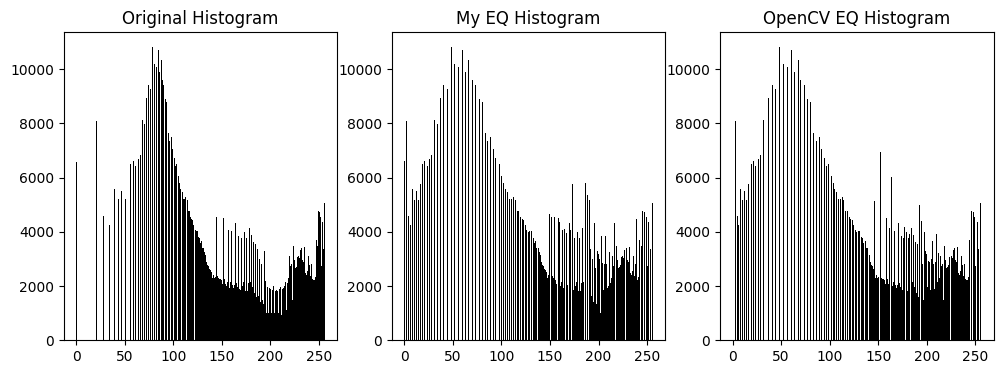

In [4]:
# -------------------------------
# Step 5: Histogram Comparison (Optional)
# -------------------------------
plt.figure(figsize=(12,4))

plt.subplot(1,3,1)
plt.title("Original Histogram")
plt.hist(img.flatten(), bins=256, range=[0,256], color='black')

plt.subplot(1,3,2)
plt.title("My EQ Histogram")
plt.hist(img_eq_my.flatten(), bins=256, range=[0,256], color='black')

plt.subplot(1,3,3)
plt.title("OpenCV EQ Histogram")
plt.hist(img_eq_cv2.flatten(), bins=256, range=[0,256], color='black')

plt.show()
